In [23]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
%matplotlib inline
iris = load_iris()

In [4]:
data = iris.data
data = StandardScaler().fit_transform(data)

In [6]:
targets = iris.target

In [7]:
data[0:5]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673]])

In [8]:
targets[:5]

array([0, 0, 0, 0, 0])

In [9]:
mean_vectors = []
for flower_class in range(0,3):
    mean_vectors.append(np.mean(data[targets==flower_class], axis=0))
    print 'Mean Vector class %s: %s\n' % (flower_class, mean_vectors[flower_class])

Mean Vector class 0: [-1.01457897  0.84230679 -1.30487835 -1.25512862]

Mean Vector class 1: [ 0.11228223 -0.65718442  0.28508673  0.16740892]

Mean Vector class 2: [ 0.90229674 -0.18512237  1.01979162  1.08771971]



In [13]:
within_class_matrix = np.zeros((4,4))
for flower_class, mean_vector in zip(range(0,2), mean_vectors):
    class_sc_mat = np.zeros((4,4))
    for row in data[targets==flower_class]:
        row, mv = row.reshape(4,1), mean_vector.reshape(4,1)
        class_sc_mat += (row-mv).dot((row-mv).T)
    within_class_matrix += class_sc_mat
print 'within-class scatter matrix: \n', within_class_matrix

within-class scatter matrix: 
[[ 28.10567527  25.48316609   6.71996813   5.17734743]
 [ 25.48316609  63.92908905   6.08256648   7.84736926]
 [  6.71996813   6.08256648   3.97590902   2.88675011]
 [  5.17734743   7.84736926   2.88675011   4.28567807]]


In [25]:
type(data)

numpy.ndarray

In [26]:
type(targets)

numpy.ndarray

In [27]:
lda_with_sklearn = LinearDiscriminantAnalysis(n_components=2).fit_transform(data, targets)

In [17]:
lda_with_sklearn[:5]

array([[-8.0849532 ,  0.32845422],
       [-7.1471629 , -0.75547326],
       [-7.51137789, -0.23807832],
       [-6.83767561, -0.64288476],
       [-8.15781367,  0.54063935]])

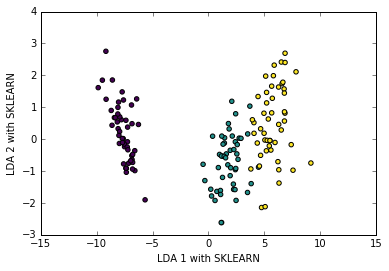

In [22]:
plt.scatter(lda_with_sklearn[:,0], lda_with_sklearn[:,1], c=targets,  cmap='viridis')
plt.xlabel('LDA 1 with SKLEARN')
plt.ylabel('LDA 2 with SKLEARN')